# What is a Graph? 

- Structured representation of connected things and how they are related

- “Six degrees of Kevin Bacon” or “White board data model”

- Foundation in mathematics (or linguistics)

- (Seven Bridges of Konigsburg) Leonhard Euler: Was there a route so that each of the seven bridges in Königsberg, Prussia (now known as Kaliningrad, Russia), would be crossed only once.  This question launched an entire branch of mathematics. 

# How does it help? 

- Dimensionality reduction

- Visualize and analyze complex relationships

- Identify critical nodes in a network

- Determine communicability between nodes

- Useful for scientific, social network, crime, or intelligence analysis

# Applicability of Graph (Link) Analysis 

## Which nodes are critical sections of a network?
- Lines of communication in business or crime networks
- Electrical transmission or water towers, distribution transformers or water mains etc.
- Road intersections or bridges
- Servers that are likely to get the most load
- Key distribution centers, finding catchment and service areas
- Spread of epidemic diseases
- Critical transport routes by affected people
- Flow of information of goods between people or places

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'Segment_ALL_CARRIER_data.csv')

In [3]:
df.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_COUNTRY_NAME,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS
0,0,3,152100,576,339,0,0,1682,717,628,...,Mexico,148,6,699,1,2018,1,1,4,F
1,0,1,49090,180,148,0,0,1669,234,215,...,Mexico,148,8,888,1,2018,1,1,4,F
2,0,1,49090,180,99,0,0,1804,246,227,...,Mexico,148,8,888,1,2018,1,1,4,F
3,0,1,29900,110,13,0,0,524,99,72,...,United States,74,6,608,1,2018,1,1,2,F
4,0,1,40270,160,53,0,0,1508,218,193,...,United States,34,6,614,1,2018,1,1,4,F


In [4]:
df.shape

(48021, 43)

In [5]:
df.describe()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP
count,48021.000000,48021.000000,4.802100e+04,48021.000000,48021.000000,4.802100e+04,48021.000000,48021.000000,48021.000000,48021.000000,...,4.802100e+04,48021.000000,48021.000000,48021.000000,48021.000000,48021.000000,48021.0,48021.000000,48021.000000,48021.000000
mean,9.638908,18.337956,1.176275e+06,3015.699028,2421.391391,2.403867e+05,2239.397014,2484.123946,2674.923638,2394.556881,...,1.311468e+06,32440.660086,256.964703,6.231336,674.284334,1.173153,2018.0,1.498428,3.498324,5.478603
std,19.163616,23.696701,1.744810e+06,4248.633118,3501.527898,8.401958e+05,15884.859532,1978.177475,5394.087489,4989.965370,...,1.724581e+05,1697.845825,296.085878,1.011503,108.492777,0.426018,0.0,0.500003,1.703691,3.947920
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,10.000000,0.000000,0.000000,...,1.013505e+06,30135.000000,1.000000,0.000000,30.000000,1.000000,2018.0,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.101260e+05,150.000000,72.000000,0.000000e+00,0.000000,1035.000000,0.000000,0.000000,...,1.169706e+06,31032.000000,36.000000,6.000000,622.000000,1.000000,2018.0,1.000000,2.000000,3.000000
50%,0.000000,10.000000,5.490000e+05,1098.000000,824.000000,2.200000e+01,0.000000,1660.000000,175.000000,145.000000,...,1.306106e+06,32105.000000,110.000000,6.000000,669.000000,1.000000,2018.0,1.000000,3.000000,4.000000
75%,12.000000,29.000000,1.592320e+06,4640.000000,3731.000000,1.397310e+05,0.000000,3962.000000,2592.000000,2180.000000,...,1.430902e+06,33289.000000,427.000000,6.000000,698.000000,1.000000,2018.0,2.000000,5.000000,8.000000
max,262.000000,350.000000,4.482280e+07,62295.000000,54321.000000,3.650028e+07,481413.000000,10266.000000,60840.000000,56112.000000,...,1.678202e+06,36756.000000,975.000000,8.000000,889.000000,4.000000,2018.0,2.000000,6.000000,21.000000


In [6]:
from arcgis import GIS

gis = GIS(r'http://esrifederal.maps.arcgis.com', 'james_jones_federal')

Enter password: ········


In [7]:
from arcgis.features import *

airports = gis.content.get('0cc3ab28ce7847c5b856154e9d84c687')
airports_lyr = airports.layers[0]
sdf = airports_lyr.query(where="1=1").sdf
sdf.head()

,OBJECTID,OBJECTID_1,SHAPE,continent,elevation_,gps_code,home_link,iata_code,id,ident,...,iso_region,keywords,latitude_d,local_code,longitude_,municipali,name,scheduled_,type,wikipedia_
0,1,1,"{""x"": -8341570.3489, ""y"": 4876236.196500003, ""...",NA,11,00A,,,6523,00A,...,US-PA,,40.070801,00A,-74.933601,Bensalem,Total Rf Heliport,no,heliport,
1,2,2,"{""x"": -16886721.3803, ""y"": 8388436.432499997, ...",NA,450,00AK,,,6524,00AK,...,US-AK,,59.949200,00AK,-151.695999,Anchor Point,Lowell Field,no,small_airport,
2,3,3,"{""x"": -9659225.8145, ""y"": 4145523.0812000036, ...",NA,820,00AL,,,6525,00AL,...,US-AL,,34.864799,00AL,-86.770302,Harvest,Epps Airpark,no,small_airport,
3,4,4,"{""x"": -10158448.7857, ""y"": 4246911.7918, ""spat...",NA,237,00AR,,,6526,00AR,...,US-AR,,35.608700,00AR,-91.254898,Newport,Newport Hospital & Clinic Heliport,no,heliport,
4,5,5,"{""x"": -12486150.7867, ""y"": 4069910.7205, ""spat...",NA,3810,00AZ,,,6527,00AZ,...,US-AZ,,34.305599,00AZ,-112.165001,Cordes,Cordes Airport,no,small_airport,


In [8]:
sdf.shape

(47997, 21)

In [9]:
sdf.describe()

,OBJECTID,OBJECTID_1,elevation_,id,latitude_d,longitude_
count,47997.000000,47997.000000,47997.000000,47997.000000,47997.000000,47997.000000
mean,23999.333167,23999.000000,1111.289976,47946.244724,25.297247,-39.634330
std,13856.069583,13855.684772,1525.814888,82536.604771,27.692645,77.913655
min,1.000000,1.000000,-1266.000000,2.000000,-80.318298,-179.876999
25%,12000.000000,12000.000000,110.000000,12116.000000,6.312222,-92.378304
50%,23999.000000,23999.000000,625.000000,24181.000000,36.353901,-74.332901
75%,35999.000000,35998.000000,1339.000000,38601.000000,43.770599,10.780556
max,47998.000000,47997.000000,22000.000000,318342.000000,82.517799,179.975700


# Graph Data Models

## Property Graph

- Associated with graph theory
- Can be derived from any highly relational dataset
- Internal structure, properties are stored as attributes in nodes
- Supports numerous graph operations
- Data organized into a rough schema

# Types of Graphs 

## Simple Graph
- Only one edge between nodes
- A – B = B – A

## Multi-Graph
- Multiple edges between nodes
- A – B = B – A

## Directed Graph
- Either simple (one edge between nodes) or multi (multiple edges) between nodes
- A – B != B - A

In [10]:
G = nx.Graph()
mG = nx.MultiDiGraph()
edges = mG.edges(keys=True)

In [11]:
airports = {}

for row in sdf.iterrows():
    ident = row[1]['iata_code']
    lat = row[1]['latitude_d']
    long = row[1]['longitude_']
    airports[ident] = [long, lat]

In [12]:
airports['IAD']

[-77.45580292, 38.94449997]

In [13]:
airports_map = gis.map()
airports_map

MapView(layout=Layout(height='400px', width='100%'))

In [14]:
airports_map.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

In [15]:
airports_map.basemap = 'gray-vector'

In [16]:
sdf.head(50).spatial.plot(map_widget=airports_map)

True

## Graph network analysis
- Topologic or geometric distance 
- between each nodes = one step (or hop)

## Nodes and Edges
- Nodes are unique entities, can represent a variety of objects
- Edges represent relationships between nodes  


In [17]:
for row in df.iterrows():
    carrier = row[1]['UNIQUE_CARRIER_NAME']
    origin = row[1]['ORIGIN']
    destination = row[1]['DEST']
    distance = row[1]['DISTANCE']
    travel_time = row[1]['RAMP_TO_RAMP']
    segment = (origin, destination)

    G.add_edge(origin, destination, carrier=carrier, distance=distance, travel_time=travel_time, segment=segment)
    
    mG.add_edge(origin, destination, carrier=carrier, distance=distance, travel_time=travel_time, segment=segment)

In [18]:
print("Total number of nodes in simple graph:  " + repr(len(G.nodes)))
print("Total number of nodes in multi graph:  " + repr(len(mG.nodes)))

Total number of nodes in simple graph:  837
Total number of nodes in multi graph:  837


In [19]:
print("Total number of edges in simple graph:  " + repr(len(G.edges)))
print("Total number of edges in multi graph:  " + repr(len(mG.edges)))

Total number of edges in simple graph:  3956
Total number of edges in multi graph:  48021


In [20]:
G.nodes.data()

NodeDataView({'MSP': {}, 'CUN': {}, 'MZT': {}, 'PVR': {}, 'MTY': {}, 'DFW': {}, 'ATL': {}, 'PAP': {}, 'PTY': {}, 'PUJ': {}, 'LAX': {}, 'ONT': {}, 'RTB': {}, 'TPA': {}, 'SAP': {}, 'SDQ': {}, 'PIT': {}, 'SJD': {}, 'IND': {}, 'SKB': {}, 'MIA': {}, 'STI': {}, 'DTW': {}, 'ZIH': {}, 'AMS': {}, 'BRU': {}, 'CDG': {}, 'FRA': {}, 'ZRH': {}, 'BCN': {}, 'SEA': {}, 'DUB': {}, 'EDI': {}, 'FCO': {}, 'BOS': {}, 'CVG': {}, 'JFK': {}, 'JNB': {}, 'MCO': {}, 'LHR': {}, 'PHL': {}, 'MXP': {}, 'TLV': {}, 'HND': {}, 'HNL': {}, 'NRT': {}, 'SPN': {}, 'PEK': {}, 'ANC': {}, 'PVG': {}, 'BFI': {}, 'YCD': {}, 'FBS': {}, 'YWH': {}, 'LKE': {}, 'YYJ': {}, 'KEH': {}, 'HKG': {}, 'ICN': {}, 'LEJ': {}, 'SNN': {}, 'LCK': {}, 'WUH': {}, 'IST': {}, 'BOG': {}, 'IAH': {}, 'ORD': {}, 'MEX': {}, 'MAD': {}, 'SCL': {}, 'OST': {}, 'ZAZ': {}, 'IAD': {}, 'GDL': {}, 'LRD': {}, 'HMO': {}, 'ELP': {}, 'YXU': {}, 'QRO': {}, 'SHV': {}, 'SLW': {}, 'TLC': {}, 'YIP': {}, 'YHM': {}, 'YYT': {}, 'BJX': {}, 'BUF': {}, 'GSO': {}, 'GSP': {}, 'JZT': 

In [21]:
G.edges.data()

EdgeDataView([('MSP', 'CUN', {'carrier': 'Sun Country Airlines d/b/a MN Airlines', 'distance': 1682, 'travel_time': 20702, 'segment': ('MSP', 'CUN')}), ('MSP', 'MZT', {'carrier': 'Sun Country Airlines d/b/a MN Airlines', 'distance': 1669, 'travel_time': 4859, 'segment': ('MSP', 'MZT')}), ('MSP', 'PVR', {'carrier': 'Sun Country Airlines d/b/a MN Airlines', 'distance': 1804, 'travel_time': 11167, 'segment': ('PVR', 'MSP')}), ('MSP', 'YYZ', {'carrier': 'Endeavor Air Inc.', 'distance': 678, 'travel_time': 11193, 'segment': ('YYZ', 'MSP')}), ('MSP', 'LGW', {'carrier': 'Norwegian Air Shuttle ASA', 'distance': 4037, 'travel_time': 0, 'segment': ('MSP', 'LGW')}), ('MSP', 'AMS', {'carrier': 'Delta Air Lines Inc.', 'distance': 4166, 'travel_time': 48182, 'segment': ('AMS', 'MSP')}), ('MSP', 'YNY', {'carrier': 'Korean Air Lines Co. Ltd.', 'distance': 6155, 'travel_time': 0, 'segment': ('MSP', 'YNY')}), ('MSP', 'MBJ', {'carrier': 'Delta Air Lines Inc.', 'distance': 2021, 'travel_time': 6204, 'segm

In [22]:
for node in G.nodes.data():
    if node[0] in airports:
        shape = airports[node[0]]
        node[1]['long'] = shape[0]
        node[1]['lat'] = shape[1]

In [23]:
for node in mG.nodes.data():
    if node[0] in airports:
        shape = airports[node[0]]
        node[1]['long'] = shape[0]
        node[1]['lat'] = shape[1]

In [24]:
G.nodes.data()

NodeDataView({'MSP': {'long': -93.2218017578, 'lat': 44.8819999695}, 'CUN': {'long': -86.8770980835, 'lat': 21.0365009308}, 'MZT': {'long': -106.26599884, 'lat': 23.1613998413}, 'PVR': {'long': -105.253997803, 'lat': 20.6800994873}, 'MTY': {'long': -100.107002258, 'lat': 25.7784996033}, 'DFW': {'long': -97.0380020142, 'lat': 32.8968009949}, 'ATL': {'long': -84.4281005859, 'lat': 33.6366996765}, 'PAP': {'long': -72.2925033569, 'lat': 18.5799999237}, 'PTY': {'long': -79.3834991455, 'lat': 9.0713596344}, 'PUJ': {'long': -68.3634033203, 'lat': 18.5673999786}, 'LAX': {'long': -118.4079971, 'lat': 33.94250107}, 'ONT': {'long': -117.600997925, 'lat': 34.0559997559}, 'RTB': {'long': -86.523003, 'lat': 16.316799}, 'TPA': {'long': -82.533203125, 'lat': 27.9755001068}, 'SAP': {'long': -87.9235992432, 'lat': 15.4525995255}, 'SDQ': {'long': -69.6688995361, 'lat': 18.4297008514}, 'PIT': {'long': -80.23290253, 'lat': 40.49150085}, 'SJD': {'long': -109.721000671, 'lat': 23.1518001556}, 'IND': {'long':

# Graph Density

- Density – The ratio of actual edges to maximum possible edges
- Dense Graphs -  Every node connected to every other node or a majority of other nodes
    - Examples – market basket analysis (graph of all items purchased together)
- Sparse Graphs – Have a low number of edges compared to the maximal number of edges
- NetworkX – Density is measured on a scale of 0 – 1
    - 0 being sparse graphs with no nodes connected to any other node
    - 1 being a fully connected graph with all nodes connected to all other nodes

In [25]:
# Calculate Graph Density
graph_density = nx.density(G)
multigraph_density = nx.density(mG)
print("Simple graph density:  " + repr(graph_density))
print("Multi graph density:  " + repr(multigraph_density))

Simple graph density:  0.011307186179851715
Multi graph density:  0.06862770317778807


Our graph is a sparse graph.

In [26]:
graph_info = nx.info(G)
print("Simple Graph Information")
print(graph_info)

Simple Graph Information
Name: 
Type: Graph
Number of nodes: 837
Number of edges: 3956
Average degree:   9.4528


In [27]:
graph_info = nx.info(mG)
print("MultiGraph Information")
print(graph_info)

MultiGraph Information
Name: 
Type: MultiDiGraph
Number of nodes: 837
Number of edges: 48021
Average in degree:  57.3728
Average out degree:  57.3728


# Components
- Component is a disconnected subgraph located in the graph
- Number of components is the count of these distinct subgraphs
- Single node with no connections is referred to as an isolated node
- NetworkX does not support component analysis on directed graphs

In [28]:
# Calculate number of components
simple_components = nx.number_connected_components(G)
print("Number of connected components:  " + repr(simple_components))

Number of connected components:  1


# Degree Centrality 

- Important nodes have many connections

- Represents the total number of connections a node has to other nodes

- In-degree represents in a directed graph how many nodes have the referenced node as a destination node

- Out-degree represents in a directed graph how many edges originate from the referenced node

In [29]:
#  Compute Degree Centrality
degree = dict(mG.degree())
nx.set_node_attributes(mG, name='degree', values=degree)

degree_s = dict(G.degree())
nx.set_node_attributes(G, name='degree', values=degree)

In [30]:
#  Compute In-Degree/Out-Degree Centrality
in_degree = dict(nx.in_degree_centrality(mG))
out_degree = dict(nx.out_degree_centrality(mG))
nx.set_node_attributes(mG, name='in degree', values=in_degree)
nx.set_node_attributes(mG, name='out degree', values=out_degree)

# Closeness Centrality

- Important nodes are close to other nodes (topological shortest path)

- Measures the average distance to all other nodes from each node

- NetworkX – this is represented as a floating point number between 0 and 1

In [31]:
#  Compute Closeness Centrality
closeness = dict(nx.closeness_centrality(mG))
nx.set_node_attributes(mG, name='closeness', values=closeness)

closeness_s = dict(nx.closeness_centrality(G))
nx.set_node_attributes(G, name='closeness', values=closeness_s)

# Betweenness Centrality

- Important nodes are connections in the network

- Measures the number of times that a particular node is a member of the shortest path between two other nodes

- NetworkX – this is represented as a float between 0 and 1

In [32]:
#  Compute Betweenness Centrality for nodes and edges
node_betweenness = dict(nx.betweenness_centrality(mG))
nx.set_node_attributes(mG, name='betweenness', values=node_betweenness)

node_betweenness_s = dict(nx.betweenness_centrality(G))
nx.set_node_attributes(G, name='betweenness', values=node_betweenness_s)

edge_betweenness_s = dict(nx.edge_betweenness_centrality(G))
nx.set_edge_attributes(G, name='betweenness', values=edge_betweenness_s)

# Other Centrality Measures

- Pagerank

- Eigenvector

- Katz

In [33]:
# Compute Pagerank for the graph
simple_pagerank = dict(nx.pagerank(G, alpha=0.9))
nx.set_node_attributes(G, name='pagerank', values=simple_pagerank)

In [34]:
# View Information about an Individual Node
nodes_list = dict(G.nodes.data())
nodes_list['RDU']

{'long': -78.7874984741,
 'lat': 35.8776016235,
 'degree': 102,
 'closeness': 0.3533389687235841,
 'betweenness': 0.0020126899901530566,
 'pagerank': 0.0020883708037933834}

# Analyzing Graphs

## Neighbors are nodes that are connected to a given node n via an edge

- All Neighbors – returns all of the neighbors of a given node

- Common Neighbors (Requires two nodes) – Determines any nodes that are shared neighbors between two nodes

- Non Neighbors – returns all nodes that are not connected to a given node

In [43]:
# Examine all of the neighbors of a node
raleigh_neighbors = nx.all_neighbors(G, 'RDU')
print(list(raleigh_neighbors))

['YYZ', 'YOW', 'KUL', 'DOH', 'YVR', 'YWG', 'YUL', 'LIR', 'YYC', 'PLS', 'BIM', 'PUJ', 'FCO', 'CUN', 'LHR', 'UVF', 'GCM', 'MEX', 'CDG']


In [44]:
# Examine all of the neighbors of a node
dulles_neighbors = nx.all_neighbors(G, 'IAD')
print(list(dulles_neighbors))

['ZRH', 'CMN', 'JED', 'RUH', 'OPO', 'KEF', 'TLV', 'LGW', 'YUL', 'DOH', 'BOG', 'LHR', 'PEK', 'DEL', 'DXB', 'SCL', 'LIM', 'YYZ', 'SKB', 'AMS', 'CDG', 'ICN', 'ADD', 'DUB', 'CPH', 'SVO', 'SAL', 'NHT', 'YTZ', 'ACC', 'DSS', 'CAY', 'BRU', 'CTS', 'GVA', 'NCE', 'YOW', 'VIE', 'MEX', 'PTY', 'GRU', 'NRT', 'FAB', 'LEJ', 'YQX', 'CUN', 'MBJ', 'PUJ', 'IST', 'AUH', 'NAS', 'LBG', 'LGG', 'YWG', 'BOD', 'SDQ', 'BBU', 'MAN', 'FRA', 'STN', 'HOW', 'YVR', 'LIN', 'YRJ', 'YMX', 'MRS', 'CTG', 'PAP', 'UVF', 'ARN', 'OSL', 'HKG', 'YHZ', 'LIR', 'PRG', 'STI', 'ZAZ', 'AUA', 'HAV', 'PLS', 'PVR', 'BDA', 'LTN', 'YPD', 'BQH', 'SNN', 'SXM', 'YYT', 'BON', 'BIQ', 'RBA', 'SXF', 'GYE', 'GOA', 'VKO', 'MUC', 'BSB', 'HND', 'SJD', 'GCM', 'GUA', 'MAD', 'SJO', 'FCO', 'BCN', 'EDI', 'LIS']


In [45]:
# Find common neighbors between two nodes
common_neighbors = nx.common_neighbors(G, 'RDU', 'IAD')
print(list(common_neighbors))

['YYZ', 'YOW', 'DOH', 'YVR', 'YWG', 'YUL', 'LIR', 'PLS', 'PUJ', 'FCO', 'CUN', 'LHR', 'UVF', 'GCM', 'MEX', 'CDG']


In [41]:
# Returns all nodes that are not immediately connected to a node
miami_non_neighbors = nx.non_neighbors(G, 'IAD')
print(list(miami_non_neighbors))

['MSP', 'MZT', 'MTY', 'DFW', 'ATL', 'LAX', 'ONT', 'RTB', 'TPA', 'SAP', 'PIT', 'IND', 'MIA', 'DTW', 'ZIH', 'SEA', 'BOS', 'CVG', 'JFK', 'JNB', 'MCO', 'PHL', 'MXP', 'HNL', 'SPN', 'ANC', 'PVG', 'BFI', 'YCD', 'FBS', 'YWH', 'LKE', 'YYJ', 'KEH', 'LCK', 'WUH', 'IAH', 'ORD', 'OST', 'GDL', 'LRD', 'HMO', 'ELP', 'YXU', 'QRO', 'SHV', 'SLW', 'TLC', 'YIP', 'YHM', 'BJX', 'BUF', 'GSO', 'GSP', 'JZT', 'MCI', 'MEM', 'MQY', 'YQG', 'OKC', 'SDF', 'SAV', 'FGI', 'PPG', 'TBU', 'GUM', 'NGO', 'PUS', 'GYD', 'BLA', 'EWR', 'LBA', 'BGR', 'BSL', 'BRN', 'TER', 'FLL', 'YQB', 'PIE', 'LAR', 'COS', 'STR', 'DOV', 'EZE', 'MDE', 'UIO', 'OKO', 'SUU', 'RMS', 'RSW', 'UAM', 'OSN', 'CHS', 'MAJ', 'ROR', 'TKK', 'PNI', 'YEG', 'AUS', 'YYC', 'SAT', 'BZE', 'CLT', 'MSY', 'MGA', 'MID', 'SFO', 'DAL', 'SJC', 'DOM', 'SJU', 'FDF', 'PTP', 'CAN', 'HGH', 'TNA', 'MNL', 'ORY', 'KIX', 'TPE', 'BDL', 'BFS', 'SWF', 'BGO', 'BWI', 'PVD', 'ORK', 'YYR', 'LAS', 'ALB', 'OAK', 'DEN', 'RIX', 'FUK', 'DCA', 'GTF', 'YQR', 'PDX', 'SAN', 'YXX', 'YKA', 'SLC', 'PDL'

# Path Determination

## Multiple functions for determining Path
### Has Path 
- Returns a boolean (True/False) if there is a path from source to target

### Shortest Path
- Returns a list object of ordered nodes for path from Source Node to Target Node
- Determines the shortest topological path between two nodes
- Can incorporate weights as an impediment
- Can invoke many different common path algorithms (Dijkstra, Bellman-Ford)

In [46]:
# Determines if there is a path between two nodes
iad_has_path = nx.has_path(G, 'IAD', 'MIA')
iad_has_path

True

In [47]:
# Find the Shortest Path between two nodes based on travel time
shortest_path_tt = list(nx.shortest_path(mG, 'IAD', 'MIA', travel_time))
shortest_path_tt

['IAD', 'CMN', 'MIA']

# Creating Subgraphs

- Subgraph is a subset of an existing graph
- Useful for analyzing larger graphs by breaking it down into connected components for analysis
- Common form is the ‘Ego Graph’, allows a user to pass a node of interest and returns a subgraph of neighbors and connections among neighbors

In [48]:
dulles_ego = nx.ego_graph(mG, 'IAD')

# Drawing Graphs

## Topological Views

- Display data as a series of nodes and edges with many different layout options
- Position can be determined by a variety of factors
- Sometimes referred to as a "Link Chart"

In [49]:
pos = nx.spring_layout(dulles_ego)

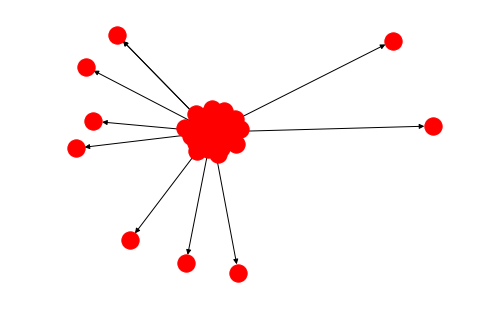

In [50]:
nx.draw(dulles_ego)

## Map Views

- Useful when mapping spatial graphs
- Various ways to symbolize and display graph content

### Viewing the Node Information

In [65]:
nodes_df = pd.DataFrame.from_dict(dict(G.nodes.data()), orient='index')
nodes_df.head()

,long,lat,degree,closeness,betweenness,pagerank
ABE,-75.440804,40.652100,4,0.326053,0.000049,0.000448
ABI,-99.681900,32.411301,5,0.314522,0.000239,0.000657
ABQ,-106.609001,35.040199,8,0.308943,0.000026,0.000423
ABV,7.263170,9.006790,1,0.297403,0.000000,0.000230
ACA,-99.753998,16.757099,32,0.318476,0.000114,0.000630


### Viewing the Edge Information

In [66]:
flights_edges = pd.DataFrame.from_dict(dict(G.edges), orient='index')
flights_edges.head()

carrier  distance  \
ACY ODE                                   VistaJet Limited      3864   
AEX ACC                         Omni Air International LLC      6163   
    DSS                         Omni Air International LLC      4856   
    SLU  Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...      2327   
AFW SID                               Volga-Dnepr Airlines      4711   

         travel_time     segment  betweenness  
ACY ODE            0  (ACY, ODE)     0.002389  
AEX ACC          726  (AEX, ACC)     0.000127  
    DSS          672  (DSS, AEX)     0.000172  
    SLU          318  (SLU, AEX)     0.000519  
AFW SID            0  (AFW, SID)     0.000169

### Converting the Data from a Table to a Feature Class

In [ ]:
"""
import arcpy
edges_table = r'C:\Users\jame9353\Documents\ArcGIS\Projects\Defense and Intel Forum\GraphAnalysis.gdb\edges_table'
edges = r'C:\Users\jame9353\Documents\ArcGIS\Projects\Defense and Intel Forum\GraphAnalysis.gdb\edges'
fields = ['OBJECTID', 'SHAPE@', 'carrier', 'distance', 'travel_time', 'segment', 'betweenness', 'shape_1']
cursor = arcpy.da.InsertCursor(edges, fields)
for row in arcpy.da.SearchCursor('edges_table', "*"):
    object_id = row[0]
    carrier = row[2]
    distance = row[3]
    travel_time = row[4]
    segment = row[5]
    betweenness = row[6]
    flight_shape = row[7]
    origin_long = row[7].split("]")[0].split("[")[2].split(',')[0]
    origin_lat = row[7].split("]")[0].split("[")[2].split(',')[1]
    destination_long = row[7].split("]")[1].split("[")[1].split(',')[0]
    destination_lat = row[7].split("]")[1].split("[")[1].split(',')[1]
    feature = [[origin_long, origin_lat], [destination_long, destination_lat]]
    features = "there were once points here..."
    line = arcpy.Polyline(arcpy.Array([arcpy.Point(*coords) for coords in feature]))
    iRow = [object_id, line, carrier, distance, travel_time, segment, betweenness, features]
    cursor.insertRow(iRow)

del cursor
"""

### Importing the data as a Web Map

<Item title:"Graph Analysis" type:Web Map owner:james_jones_federal>
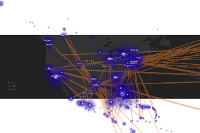

In [61]:
graph_map = gis.content.get('a7a5080ead6e4f9cbd3bc7911027d215')
display(graph_map)

In [64]:
from arcgis.mapping import WebMap
graph_map_obj  = WebMap(graph_map)
graph_map_obj

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

# Storing Graph Content

### Chose a database that fits your data model 
- Property graphs => Graph Databases
- RDF Graphs => Triple Stores
- Why not both?

- Let the problem guide the solution, not the solution guide the problem

### Interoperability and Access need to be evaluated

### How will end-users access the data?
